This notebook shifts eke one day prior to enable it for use as an input feature.

In [1]:
import xarray as xr


def shift_data_left_keep_time_coords(ds, dim: str = "time", steps: int = 1):
    """Shift data earlier along `dim` without changing coordinates.

    Works for both `xr.Dataset` and `xr.DataArray` because both implement
    `.shift()` and `.isel()`.

    After shifting, `steps` values at the end have no source data; they are dropped.
    """
    # if steps < 0:
    #     raise ValueError("steps must be >= 0")
    # if steps == 0:
    #     return ds

    shifted = ds.shift({dim: -steps})
    return shifted.isel({dim: slice(None, -steps)})


# Example:
# ds_shifted = shift_data_left_keep_time_coords(ds, dim="time", steps=1)


In [9]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/coarsened_data/'
filename = 'MINT_1d_0061-0072_eke_c_SO_JET.nc'

ds = xr.open_dataset(directory + filename)
ds_shifted = shift_data_left_keep_time_coords(ds, dim="t", steps=1)

ds_shifted

<xarray.Dataset>
Dimensions:  (t: 4319, y_c: 54, x_c: 60)
Coordinates:
  * t        (t) object 0061-01-02 00:00:00 ... 0072-12-30 00:00:00
    gphit    (y_c, x_c) float64 ...
    glamt    (y_c, x_c) float64 ...
Dimensions without coordinates: y_c, x_c
Data variables:
    eke      (t, y_c, x_c) float64 0.02504 0.005722 0.002758 ... 0.03726 0.02276
Attributes:
    description:  DINO EXP16 regridded to EXP4 -> ocean T grid variables

In [10]:
ds_shifted = ds_shifted.rename({'eke': 'eke_shift'})

In [11]:
ds_shifted

<xarray.Dataset>
Dimensions:    (t: 4319, y_c: 54, x_c: 60)
Coordinates:
  * t          (t) object 0061-01-02 00:00:00 ... 0072-12-30 00:00:00
    gphit      (y_c, x_c) float64 ...
    glamt      (y_c, x_c) float64 ...
Dimensions without coordinates: y_c, x_c
Data variables:
    eke_shift  (t, y_c, x_c) float64 0.02504 0.005722 ... 0.03726 0.02276
Attributes:
    description:  DINO EXP16 regridded to EXP4 -> ocean T grid variables

In [12]:
ds_shifted.to_netcdf(directory + 'MINT_1d_0061-0072_eke_c_SO_JET_shifted.nc')

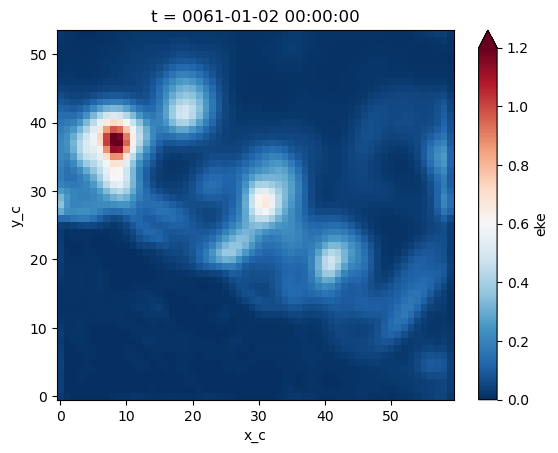

In [16]:
ds_shifted.eke.isel(t=0).plot(vmin=0, vmax=1.2, cmap='RdBu_r')

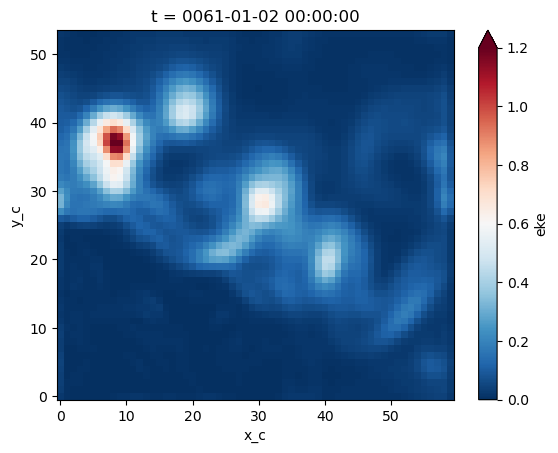

In [17]:
ds.eke.isel(t=0).plot(vmin=0, vmax=1.2, cmap='RdBu_r')